In [ ]:
import requests
from bs4 import BeautifulSoup

from datetime import datetime, timedelta

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import time

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!wget -N https://raw.githubusercontent.com/heisendelta/vleague-japan-analysis/refs/heads/main/data/unfinished_matches.csv
!wget -N https://raw.githubusercontent.com/heisendelta/vleague-japan-analysis/refs/heads/main/data/unfinished_matches_with_scores.csv
!wget -N https://raw.githubusercontent.com/heisendelta/vleague-japan-analysis/refs/heads/main/data/venues.csv

--2025-01-12 10:56:45--  https://raw.githubusercontent.com/heisendelta/vleague-japan-analysis/refs/heads/main/data/unfinished_matches.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9237 (9.0K) [text/plain]
Saving to: ‘unfinished_matches.csv’

unfinished_matches. 100%[===================>]   9.02K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2025-01-12 10:56:45 (80.4 MB/s) - ‘unfinished_matches.csv’ saved [9237/9237]

--2025-01-12 10:56:46--  https://raw.githubusercontent.com/heisendelta/vleague-japan-analysis/refs/heads/main/data/unfinished_matches_with_scores.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubuserconte

In [ ]:
unfinished_matches = pd.read_csv('unfinished_matches_with_scores.csv')
unfinished_matches['mean_score'] = unfinished_matches[[
    c for c in unfinished_matches.columns if c.startswith('predicted_score')]].mean(axis=1)
unfinished_matches['score'] = 1 / unfinished_matches['mean_score']
unfinished_matches = unfinished_matches[['date', 'home_team', 'away_team', 'venue', 'score']]

venues = pd.read_csv('venues.csv').replace('-', pd.NA).dropna()
venues['time'] = venues['time'].apply(lambda x: datetime.strptime(x, '%Hh%Mm').time())

In [ ]:
unfinished_matches

,date,home_team,away_team,venue,score
0,2025-03-23T12:00,FKAGOSHIMA,AISIN,Fアリーナいちき串木野,33.261413
1,2025-03-22T13:00,FKAGOSHIMA,AISIN,Fアリーナいちき串木野,33.261413
2,2025-01-26T12:00,HYOGO Delfino,FUKUOKA WS,明石中央体育会館,-33.462262
3,2025-01-25T14:00,HYOGO Delfino,FUKUOKA WS,明石中央体育会館,-33.462262
4,2025-01-18T13:00,Chiba,TOKYOVERDY,YohaSアリーナ～本能に、感動を。～,-31.183427
...,...,...,...,...,...
139,2025-02-23T12:00,HYOGO Delfino,FKAGOSHIMA,南あわじ市文化体育館,-1.024476
140,2025-03-08T15:00,HOKKAIDO YS,TOKYOVERDY,Kitagas Arena Sapporo,1.143880
141,2025-03-09T15:00,HOKKAIDO YS,TOKYOVERDY,Kitagas Arena Sapporo,1.143880
142,2025-02-16T13:00,KUBOTA,Kinki,Baycom General Gymnasium,1.270846


In [ ]:
match_with_venues = unfinished_matches.merge(venues, on='venue', how='left').dropna(axis=0)
match_with_venues['date'] = match_with_venues['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M'))
match_with_venues['cost'] = match_with_venues['cost'].apply(int)

match_with_venues

,date,home_team,away_team,venue,score,cost,time,latitude,longitude
2,2025-01-26 12:00:00,HYOGO Delfino,FUKUOKA WS,明石中央体育会館,-33.462262,15870,04:46:00,34.707447,134.957828
3,2025-01-25 14:00:00,HYOGO Delfino,FUKUOKA WS,明石中央体育会館,-33.462262,15870,04:46:00,34.707447,134.957828
4,2025-01-18 13:00:00,Chiba,TOKYOVERDY,YohaSアリーナ～本能に、感動を。～,-31.183427,530,00:59:00,35.622558,140.114734
5,2025-01-19 12:00:00,Chiba,TOKYOVERDY,YohaSアリーナ～本能に、感動を。～,-31.183427,530,00:59:00,35.622558,140.114734
6,2025-01-19 12:00:00,GaRons,FUJITSU,須坂市市民体育館,-27.735218,8900,02:57:00,36.652770,138.318415
...,...,...,...,...,...,...,...,...,...
135,2025-02-23 13:00:00,TOKYOVERDY,SAITAMA,TBC,-1.340774,670,01:16:00,35.792178,139.813760
136,2025-02-22 13:00:00,KUBOTA,Daido,Asue Arena Osaka,1.458637,14920,03:45:00,34.659450,135.444707
137,2025-02-23 13:00:00,KUBOTA,Daido,Asue Arena Osaka,1.458637,14920,03:45:00,34.659450,135.444707
142,2025-02-16 13:00:00,KUBOTA,Kinki,Baycom General Gymnasium,1.270846,14950,03:43:00,34.731436,135.423798


In [ ]:
a = 1 # arbitrary constant for scaling

match_with_venues_copy = match_with_venues.copy()
match_with_venues_copy['score_per_cost'] = (a * abs(match_with_venues_copy['score'])) / match_with_venues_copy['cost']

match_with_venues_copy_copy = match_with_venues_copy[['date', 'home_team', 'away_team', 'score', 'cost', 'score_per_cost']].copy()
match_with_venues_copy_copy['score_abs'] = abs(match_with_venues_copy_copy['score'])
match_with_venues_copy_copy = match_with_venues_copy_copy.sort_values(by='score_abs', ascending=False)

quartiles = 5
quartile_range = np.arange(0, 101, 100 // quartiles) / 100

quartiles_df = match_with_venues_copy_copy[
    match_with_venues_copy_copy['score_abs'].isin(match_with_venues_copy_copy['score_abs'].quantile(quartile_range))]
quartiles_df

,date,home_team,away_team,score,cost,score_per_cost,score_abs
2,2025-01-26 12:00:00,HYOGO Delfino,FUKUOKA WS,-33.462262,15870,0.002109,33.462262
3,2025-01-25 14:00:00,HYOGO Delfino,FUKUOKA WS,-33.462262,15870,0.002109,33.462262
24,2025-03-02 14:30:00,VEERTIEN,KUBOTA,-10.381247,12070,0.000860,10.381247
25,2025-03-01 15:30:00,VEERTIEN,KUBOTA,-10.381247,12070,0.000860,10.381247
45,2025-03-01 12:00:00,NARA,Kinden,-4.475486,14940,0.000300,4.475486
44,2025-03-02 13:00:00,NARA,Kinden,-4.475486,14940,0.000300,4.475486
95,2025-03-15 14:00:00,Daido,Kinden,-2.850831,11880,0.000240,2.850831
94,2025-03-16 13:00:00,Daido,Kinden,-2.850831,11880,0.000240,2.850831
124,2025-03-22 13:00:00,FUJITSU,Chiba,1.942122,710,0.002735,1.942122
125,2025-03-23 13:00:00,FUJITSU,Chiba,1.942122,710,0.002735,1.942122


In [ ]:
# Making the scores linear
sorted_scores = np.partition(match_with_venues_copy_copy['score_abs'].unique(), 1)
slope = sorted_scores[1] - sorted_scores[0]

match_with_venues_copy_copy['score_linear'] = match_with_venues_copy_copy['score_abs'].apply(
    lambda x: np.where(sorted_scores == x)[0][0] * slope + sorted_scores.min())

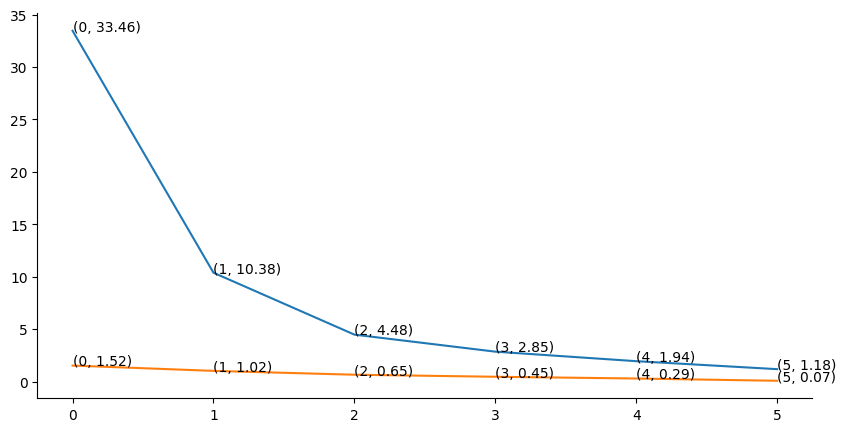

In [ ]:
y = quartiles_df['score_abs'].unique()
x = np.arange(len(y))

assert (y != 0).all()
y_scaled = np.log(y) / np.log(10)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.plot(x, y_scaled)

for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, f'({i_x}, {i_y:.2f})')
for i_x, i_y in zip(x, y_scaled):
    plt.text(i_x, i_y, f'({i_x}, {i_y:.2f})')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [ ]:
match_with_venues.loc[
    match_with_venues
        .sort_values(by=['cost', 'score', 'date'], ascending=[True, False, True])[['cost', 'score']]
        .drop_duplicates(keep='first', inplace=False)
        .index
].drop(['latitude', 'longitude'], axis=1, errors='ignore')

,date,home_team,away_team,venue,score,cost,time
121,2025-02-15 13:00:00,Chiba,HOKKAIDO YS,YohaSアリーナ～本能に、感動を。～,-1.181430,530,00:59:00
115,2025-03-01 13:00:00,Chiba,SAITAMA,YohaSアリーナ～本能に、感動を。～,-1.373062,530,00:59:00
133,2025-03-15 13:00:00,Chiba,R Tochigi,YohaSアリーナ～本能に、感動を。～,-1.525609,530,00:59:00
4,2025-01-18 13:00:00,Chiba,TOKYOVERDY,YohaSアリーナ～本能に、感動を。～,-31.183427,530,00:59:00
134,2025-02-22 14:00:00,TOKYOVERDY,SAITAMA,TBC,-1.340774,670,01:16:00
124,2025-03-22 13:00:00,FUJITSU,Chiba,川崎市とどろきアリーナ（サブアリーナ）,1.942122,710,01:15:00
9,2025-03-01 13:00:00,FUJITSU,GaRons,宮前スポーツセンター,27.735218,730,01:32:00
110,2025-01-25 14:00:00,SAITAMA,FUJITSU,富士見市市民総合体育館,2.130752,740,01:39:00
68,2025-03-01 14:00:00,TOKYOVERDY,R Tochigi,日野市市民の森ふれあいホール,-3.139964,790,01:24:00
23,2025-02-01 13:00:00,FUJITSU,Sun GAIA,Culttz Kawasaki,9.343948,860,01:00:00


In [ ]:
match_with_venues_copy = match_with_venues_copy.sort_values(by='score_per_cost', ascending=False)
# match_with_venues_copy.drop(['time', 'latitude', 'longitude'], axis=1).head(20) # shows matches between the same teams consecutively
match_without_duplicates = match_with_venues_copy.loc[
    match_with_venues_copy[['home_team', 'away_team']].drop_duplicates(keep='first', inplace=False).index]
match_without_duplicates.head(10)

,date,home_team,away_team,venue,score,cost,time,latitude,longitude,score_per_cost
4,2025-01-18 13:00:00,Chiba,TOKYOVERDY,YohaSアリーナ～本能に、感動を。～,-31.183427,530,00:59:00,35.622558,140.114734,0.058837
8,2025-03-02 13:00:00,FUJITSU,GaRons,宮前スポーツセンター,27.735218,730,01:32:00,35.589743,139.562303,0.037993
23,2025-02-01 13:00:00,FUJITSU,Sun GAIA,Culttz Kawasaki,9.343948,860,01:00:00,35.529832,139.708532,0.010865
46,2025-02-22 16:30:00,Sun GAIA,GaRons,Tsukuba Capio,-12.433803,1370,01:27:00,36.079056,140.116065,0.009076
40,2025-02-09 13:00:00,FUJITSU,R Tochigi,小田原アリーナ,-7.708711,1060,02:22:00,35.293312,139.154796,0.007272
56,2025-02-15 14:00:00,TOKYOVERDY,FUJITSU,稲城市総合体育館,-4.384201,920,01:42:00,35.631908,139.486134,0.004765
67,2025-03-02 13:00:00,TOKYOVERDY,R Tochigi,日野市市民の森ふれあいホール,-3.139964,790,01:24:00,35.681314,139.402845,0.003975
30,2025-03-09 13:00:00,R Tochigi,GaRons,FUKAI SQUARE GARDEN 足利,9.564765,2440,02:17:00,36.343232,139.463967,0.003920
7,2025-01-18 14:00:00,GaRons,FUJITSU,須坂市市民体育館,-27.735218,8900,02:57:00,36.652770,138.318415,0.003116
110,2025-01-25 14:00:00,SAITAMA,FUJITSU,富士見市市民総合体育館,2.130752,740,01:39:00,35.856895,139.551543,0.002879


In [ ]:
match_with_venues.sort_values(by=['cost', 'score'], ascending=[True, False]).head(10)

,date,home_team,away_team,venue,score,cost,time,latitude,longitude
118,2025-02-16 12:00:00,Chiba,HOKKAIDO YS,YohaSアリーナ～本能に、感動を。～,-1.181430,530,00:59:00,35.622558,140.114734
121,2025-02-15 13:00:00,Chiba,HOKKAIDO YS,YohaSアリーナ～本能に、感動を。～,-1.181430,530,00:59:00,35.622558,140.114734
115,2025-03-01 13:00:00,Chiba,SAITAMA,YohaSアリーナ～本能に、感動を。～,-1.373062,530,00:59:00,35.622558,140.114734
116,2025-03-02 12:00:00,Chiba,SAITAMA,YohaSアリーナ～本能に、感動を。～,-1.373062,530,00:59:00,35.622558,140.114734
132,2025-03-16 12:00:00,Chiba,R Tochigi,YohaSアリーナ～本能に、感動を。～,-1.525609,530,00:59:00,35.622558,140.114734
133,2025-03-15 13:00:00,Chiba,R Tochigi,YohaSアリーナ～本能に、感動を。～,-1.525609,530,00:59:00,35.622558,140.114734
4,2025-01-18 13:00:00,Chiba,TOKYOVERDY,YohaSアリーナ～本能に、感動を。～,-31.183427,530,00:59:00,35.622558,140.114734
5,2025-01-19 12:00:00,Chiba,TOKYOVERDY,YohaSアリーナ～本能に、感動を。～,-31.183427,530,00:59:00,35.622558,140.114734
134,2025-02-22 14:00:00,TOKYOVERDY,SAITAMA,TBC,-1.340774,670,01:16:00,35.792178,139.813760
135,2025-02-23 13:00:00,TOKYOVERDY,SAITAMA,TBC,-1.340774,670,01:16:00,35.792178,139.813760


In [ ]:
match_with_venues.loc[
    match_with_venues
        .sort_values(by=['cost', 'score', 'date'], ascending=[True, False, True])[['cost', 'score']]
        .drop_duplicates(keep='first', inplace=False)
        .index
].drop(['latitude', 'longitude'], axis=1, errors='ignore')

,date,home_team,away_team,venue,score,cost,time
121,2025-02-15 13:00:00,Chiba,HOKKAIDO YS,YohaSアリーナ～本能に、感動を。～,-1.181430,530,00:59:00
115,2025-03-01 13:00:00,Chiba,SAITAMA,YohaSアリーナ～本能に、感動を。～,-1.373062,530,00:59:00
133,2025-03-15 13:00:00,Chiba,R Tochigi,YohaSアリーナ～本能に、感動を。～,-1.525609,530,00:59:00
4,2025-01-18 13:00:00,Chiba,TOKYOVERDY,YohaSアリーナ～本能に、感動を。～,-31.183427,530,00:59:00
134,2025-02-22 14:00:00,TOKYOVERDY,SAITAMA,TBC,-1.340774,670,01:16:00
124,2025-03-22 13:00:00,FUJITSU,Chiba,川崎市とどろきアリーナ（サブアリーナ）,1.942122,710,01:15:00
9,2025-03-01 13:00:00,FUJITSU,GaRons,宮前スポーツセンター,27.735218,730,01:32:00
110,2025-01-25 14:00:00,SAITAMA,FUJITSU,富士見市市民総合体育館,2.130752,740,01:39:00
68,2025-03-01 14:00:00,TOKYOVERDY,R Tochigi,日野市市民の森ふれあいホール,-3.139964,790,01:24:00
23,2025-02-01 13:00:00,FUJITSU,Sun GAIA,Culttz Kawasaki,9.343948,860,01:00:00


In [ ]:
a = 1

match_with_venues_copy_copy['score_per_cost'] = (a * abs(match_with_venues_copy_copy['score_linear'])) / match_with_venues_copy_copy['cost']
match_with_venues_copy_copy.sort_values(by='score_per_cost', ascending=False).head(50)

,date,home_team,away_team,score,cost,score_per_cost,score_abs,score_linear
116,2025-03-02 12:00:00,Chiba,SAITAMA,-1.373062,530,0.007371,1.373062,3.906590
115,2025-03-01 13:00:00,Chiba,SAITAMA,-1.373062,530,0.007371,1.373062,3.906590
133,2025-03-15 13:00:00,Chiba,R Tochigi,-1.525609,530,0.007137,1.525609,3.782719
132,2025-03-16 12:00:00,Chiba,R Tochigi,-1.525609,530,0.007137,1.525609,3.782719
134,2025-02-22 14:00:00,TOKYOVERDY,SAITAMA,-1.340774,670,0.006016,1.340774,4.030461
135,2025-02-23 13:00:00,TOKYOVERDY,SAITAMA,-1.340774,670,0.006016,1.340774,4.030461
124,2025-03-22 13:00:00,FUJITSU,Chiba,1.942122,710,0.005153,1.942122,3.658848
125,2025-03-23 13:00:00,FUJITSU,Chiba,1.942122,710,0.005153,1.942122,3.658848
110,2025-01-25 14:00:00,SAITAMA,FUJITSU,2.130752,740,0.004861,2.130752,3.596913
111,2025-01-26 14:00:00,SAITAMA,FUJITSU,2.130752,740,0.004861,2.130752,3.596913


## Clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
match_with_venues_copy = match_with_venues.copy()

match_with_venues_copy['date_numeric'] = (pd.to_datetime(match_with_venues_copy['date']) - pd.to_datetime(match_with_venues_copy['date']).min())
match_with_venues_copy['date_numeric'] = match_with_venues_copy['date_numeric'].dt.total_seconds() / (60 * 60 * 24)

In [ ]:
features = match_with_venues_copy[['latitude', 'longitude', 'date_numeric']]

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

db = DBSCAN(eps=0.5, min_samples=2, metric='euclidean')
match_with_venues_copy['cluster'] = db.fit_predict(normalized_features)

match_with_venues_copy

,date,home_team,away_team,venue,score,cost,time,latitude,longitude,date_numeric,cluster
2,2025-01-26 12:00:00,HYOGO Delfino,FUKUOKA WS,明石中央体育会館,-33.462262,15870,04:46:00,34.707447,134.957828,15.000000,0
3,2025-01-25 14:00:00,HYOGO Delfino,FUKUOKA WS,明石中央体育会館,-33.462262,15870,04:46:00,34.707447,134.957828,14.083333,0
4,2025-01-18 13:00:00,Chiba,TOKYOVERDY,YohaSアリーナ～本能に、感動を。～,-31.183427,530,00:59:00,35.622558,140.114734,7.041667,1
5,2025-01-19 12:00:00,Chiba,TOKYOVERDY,YohaSアリーナ～本能に、感動を。～,-31.183427,530,00:59:00,35.622558,140.114734,8.000000,1
6,2025-01-19 12:00:00,GaRons,FUJITSU,須坂市市民体育館,-27.735218,8900,02:57:00,36.652770,138.318415,8.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
135,2025-02-23 13:00:00,TOKYOVERDY,SAITAMA,TBC,-1.340774,670,01:16:00,35.792178,139.813760,43.041667,3
136,2025-02-22 13:00:00,KUBOTA,Daido,Asue Arena Osaka,1.458637,14920,03:45:00,34.659450,135.444707,42.041667,5
137,2025-02-23 13:00:00,KUBOTA,Daido,Asue Arena Osaka,1.458637,14920,03:45:00,34.659450,135.444707,43.041667,5
142,2025-02-16 13:00:00,KUBOTA,Kinki,Baycom General Gymnasium,1.270846,14950,03:43:00,34.731436,135.423798,36.041667,5


In [ ]:
from IPython.display import display, HTML

In [ ]:
clustered_matches = match_with_venues_copy.groupby('cluster')
for cluster, matches in clustered_matches:
    if len(matches) > 2:
        if cluster == -1:
            print("\nOutliers:")
        else:
            print(f"\nCluster {cluster}:")

        match_info = matches[['date', 'home_team', 'away_team', 'venue', 'score']]
        display(HTML(match_info.to_html()))
        # print(matches[['date', 'home_team', 'away_team', 'venue', 'latitude', 'longitude']])


Cluster 0:


,date,home_team,away_team,venue,score
2,2025-01-26 12:00:00,HYOGO Delfino,FUKUOKA WS,明石中央体育会館,-33.462262
3,2025-01-25 14:00:00,HYOGO Delfino,FUKUOKA WS,明石中央体育会館,-33.462262
10,2025-01-19 12:00:00,Kinki,Daido,近畿大学記念会館,-31.672053
11,2025-01-18 14:00:00,Kinki,Daido,近畿大学記念会館,-31.672053
14,2025-01-11 12:00:00,NARA,Kinki,FSS35スポーツアリーナ,32.626792
15,2025-01-12 12:00:00,NARA,Kinki,FSS35スポーツアリーナ,32.626792
37,2025-01-26 13:00:00,KUBOTA,AISIN,Ookini Arena Maishima,7.645318
38,2025-01-25 13:00:00,KUBOTA,AISIN,Ookini Arena Maishima,7.645318
48,2025-01-11 13:00:00,KUBOTA,Kinden,大阪市立東淀川体育館,5.432800
49,2025-01-12 13:00:00,KUBOTA,Kinden,大阪市立東淀川体育館,5.432800



Cluster 3:


,date,home_team,away_team,venue,score
8,2025-03-02 13:00:00,FUJITSU,GaRons,宮前スポーツセンター,27.735218
9,2025-03-01 13:00:00,FUJITSU,GaRons,宮前スポーツセンター,27.735218
46,2025-02-22 16:30:00,Sun GAIA,GaRons,Tsukuba Capio,-12.433803
47,2025-02-23 16:30:00,Sun GAIA,GaRons,Tsukuba Capio,-12.433803
56,2025-02-15 14:00:00,TOKYOVERDY,FUJITSU,稲城市総合体育館,-4.384201
57,2025-02-16 13:00:00,TOKYOVERDY,FUJITSU,稲城市総合体育館,-4.384201
67,2025-03-02 13:00:00,TOKYOVERDY,R Tochigi,日野市市民の森ふれあいホール,-3.139964
68,2025-03-01 14:00:00,TOKYOVERDY,R Tochigi,日野市市民の森ふれあいホール,-3.139964
78,2025-02-15 14:00:00,SAITAMA,Sun GAIA,騎西総合体育館,2.705162
79,2025-02-16 14:00:00,SAITAMA,Sun GAIA,騎西総合体育館,2.705162



Cluster 5:


,date,home_team,away_team,venue,score
16,2025-03-15 11:00:00,VEERTIEN,FKAGOSHIMA,亀山市西野公園体育館,-27.500030
17,2025-03-16 10:00:00,VEERTIEN,FKAGOSHIMA,亀山市西野公園体育館,-27.500030
18,2025-02-15 12:00:00,Kinden,FKAGOSHIMA,岸和田市総合体育館,-23.230932
19,2025-02-16 12:00:00,Kinden,FKAGOSHIMA,岸和田市総合体育館,-23.230932
24,2025-03-02 14:30:00,VEERTIEN,KUBOTA,Yokkaichi City General Gymnasium,-10.381247
25,2025-03-01 15:30:00,VEERTIEN,KUBOTA,Yokkaichi City General Gymnasium,-10.381247
26,2025-03-16 12:00:00,NARA,HYOGO Delfino,西部生涯スポーツセンター,6.843774
27,2025-03-15 12:00:00,NARA,HYOGO Delfino,西部生涯スポーツセンター,6.843774
36,2025-03-08 14:00:00,AISIN,KUBOTA,碧南市臨海体育館,-7.645318
39,2025-03-09 13:00:00,AISIN,KUBOTA,碧南市臨海体育館,-7.645318



Cluster 12:


,date,home_team,away_team,venue,score
54,2025-03-15 13:00:00,FUJITSU,TOKYOVERDY,トッケイセキュリティ平塚総合体育館,4.384201
55,2025-03-16 13:00:00,FUJITSU,TOKYOVERDY,トッケイセキュリティ平塚総合体育館,4.384201
124,2025-03-22 13:00:00,FUJITSU,Chiba,川崎市とどろきアリーナ（サブアリーナ）,1.942122
125,2025-03-23 13:00:00,FUJITSU,Chiba,川崎市とどろきアリーナ（サブアリーナ）,1.942122
132,2025-03-16 12:00:00,Chiba,R Tochigi,YohaSアリーナ～本能に、感動を。～,-1.525609
133,2025-03-15 13:00:00,Chiba,R Tochigi,YohaSアリーナ～本能に、感動を。～,-1.525609



Cluster 13:


,date,home_team,away_team,venue,score
60,2025-02-16 14:00:00,Daido,VEERTIEN,メディアス体育館ちた,-3.601685
61,2025-02-15 17:00:00,Daido,VEERTIEN,メディアス体育館ちた,-3.601685
100,2025-02-08 14:00:00,Daido,AISIN,南知多町総合体育館,-2.414897
101,2025-02-09 13:00:00,Daido,AISIN,南知多町総合体育館,-2.414897



Cluster 15:


,date,home_team,away_team,venue,score
66,2025-02-02 13:00:00,R Tochigi,TOKYOVERDY,ブレックスアリーナ宇都宮,3.139964
69,2025-02-01 14:00:00,R Tochigi,TOKYOVERDY,ブレックスアリーナ宇都宮,3.139964
104,2025-02-08 16:30:00,Sun GAIA,Chiba,Ikenokawa Sakura Arena,1.841093
105,2025-02-09 16:30:00,Sun GAIA,Chiba,Ikenokawa Sakura Arena,1.841093



Cluster 22:


,date,home_team,away_team,venue,score
110,2025-01-25 14:00:00,SAITAMA,FUJITSU,富士見市市民総合体育館,2.130752
111,2025-01-26 14:00:00,SAITAMA,FUJITSU,富士見市市民総合体育館,2.130752
114,2025-02-01 14:00:00,SAITAMA,Chiba,熊谷市民体育館,1.373062
117,2025-02-02 14:00:00,SAITAMA,Chiba,熊谷市民体育館,1.373062


In [ ]:
# Distance clustering is the same
# Time clustering: All dates in a cluster are required to be in a one-week time frame

match_with_venues_copy['date_numeric'] = pd.to_datetime(match_with_venues_copy['date'])
geo_features = match_with_venues_copy[['latitude', 'longitude']]

scaler = StandardScaler()
normalized_geo_features = scaler.fit_transform(geo_features)

geo_db = DBSCAN(eps=0.5, min_samples=2, metric='euclidean')
match_with_venues_copy['geo_cluster'] = geo_db.fit_predict(normalized_geo_features)

final_clusters = []
for cluster_id in match_with_venues_copy['geo_cluster'].unique():
    if cluster_id == -1:
        continue

    cluster_matches = match_with_venues_copy[match_with_venues_copy['geo_cluster'] == cluster_id]
    cluster_matches = cluster_matches.sort_values(by='date_numeric')

    current_cluster = []
    start_date = None
    for _, row in cluster_matches.iterrows():
        if not start_date:
            start_date = row['date_numeric']
            current_cluster.append(row)
        elif (row['date_numeric'] - start_date).days <= 7:
            current_cluster.append(row)
        else:
            final_clusters.append(current_cluster)
            current_cluster = [row]
            start_date = row['date_numeric']

    if current_cluster:
        final_clusters.append(current_cluster)

clustered_matches = []
for cluster_id, matches in enumerate(final_clusters):
    for match in matches:
        match['final_cluster'] = cluster_id
        clustered_matches.append(match)

clustered_match_with_venues_copy = pd.DataFrame(clustered_matches)

# print(clustered_match_with_venues_copy[['date', 'home_team', 'away_team', 'venue', 'latitude', 'longitude', 'final_cluster']])

In [ ]:
for cluster, matches in clustered_match_with_venues_copy.groupby('final_cluster'):
    if len(matches) > 2:
        print(f"\nCluster {cluster}:", f"Size {len(matches)}")
        match_info = matches[['date', 'home_team', 'away_team', 'venue', 'score']]
        display(HTML(match_info.to_html()))


Cluster 0: Size 8


,date,home_team,away_team,venue,score
14,2025-01-11 12:00:00,NARA,Kinki,FSS35スポーツアリーナ,32.626792
48,2025-01-11 13:00:00,KUBOTA,Kinden,大阪市立東淀川体育館,5.432800
82,2025-01-11 14:00:00,AISIN,FUKUOKA WS,碧南市臨海体育館,2.487901
15,2025-01-12 12:00:00,NARA,Kinki,FSS35スポーツアリーナ,32.626792
49,2025-01-12 13:00:00,KUBOTA,Kinden,大阪市立東淀川体育館,5.432800
83,2025-01-12 13:00:00,AISIN,FUKUOKA WS,碧南市臨海体育館,2.487901
89,2025-01-18 12:00:00,Kinden,HYOGO Delfino,大和郡山市総合公園多目的体育館,2.358300
11,2025-01-18 14:00:00,Kinki,Daido,近畿大学記念会館,-31.672053



Cluster 1: Size 8


,date,home_team,away_team,venue,score
10,2025-01-19 12:00:00,Kinki,Daido,近畿大学記念会館,-31.672053
87,2025-01-19 12:00:00,Kinden,HYOGO Delfino,大和郡山市総合公園多目的体育館,2.358300
38,2025-01-25 13:00:00,KUBOTA,AISIN,Ookini Arena Maishima,7.645318
3,2025-01-25 14:00:00,HYOGO Delfino,FUKUOKA WS,明石中央体育会館,-33.462262
20,2025-01-25 14:00:00,Daido,NARA,弥富市総合社会教育センター,-25.085219
2,2025-01-26 12:00:00,HYOGO Delfino,FUKUOKA WS,明石中央体育会館,-33.462262
37,2025-01-26 13:00:00,KUBOTA,AISIN,Ookini Arena Maishima,7.645318
21,2025-01-26 13:00:00,Daido,NARA,弥富市総合社会教育センター,-25.085219



Cluster 2: Size 6


,date,home_team,away_team,venue,score
99,2025-02-01 12:00:00,Kinden,Kinki,岸和田市総合体育館,2.627198
113,2025-02-01 13:00:00,KUBOTA,HYOGO Delfino,住吉スポーツセンター,1.329902
98,2025-02-02 12:00:00,Kinden,Kinki,岸和田市総合体育館,2.627198
112,2025-02-02 13:00:00,KUBOTA,HYOGO Delfino,住吉スポーツセンター,1.329902
122,2025-02-08 14:00:00,HYOGO Delfino,VEERTIEN,西脇市総合市民センター,-1.243365
100,2025-02-08 14:00:00,Daido,AISIN,南知多町総合体育館,-2.414897



Cluster 3: Size 8


,date,home_team,away_team,venue,score
123,2025-02-09 12:00:00,HYOGO Delfino,VEERTIEN,西脇市総合市民センター,-1.243365
101,2025-02-09 13:00:00,Daido,AISIN,南知多町総合体育館,-2.414897
18,2025-02-15 12:00:00,Kinden,FKAGOSHIMA,岸和田市総合体育館,-23.230932
143,2025-02-15 13:00:00,KUBOTA,Kinki,Baycom General Gymnasium,1.270846
61,2025-02-15 17:00:00,Daido,VEERTIEN,メディアス体育館ちた,-3.601685
19,2025-02-16 12:00:00,Kinden,FKAGOSHIMA,岸和田市総合体育館,-23.230932
142,2025-02-16 13:00:00,KUBOTA,Kinki,Baycom General Gymnasium,1.270846
60,2025-02-16 14:00:00,Daido,VEERTIEN,メディアス体育館ちた,-3.601685



Cluster 4: Size 6


,date,home_team,away_team,venue,score
43,2025-02-22 12:00:00,Kinden,VEERTIEN,Wakayama Prefectural Gymnasium,-7.039834
136,2025-02-22 13:00:00,KUBOTA,Daido,Asue Arena Osaka,1.458637
42,2025-02-23 12:00:00,Kinden,VEERTIEN,Wakayama Prefectural Gymnasium,-7.039834
137,2025-02-23 13:00:00,KUBOTA,Daido,Asue Arena Osaka,1.458637
45,2025-03-01 12:00:00,NARA,Kinden,ロートアリーナ奈良,-4.475486
25,2025-03-01 15:30:00,VEERTIEN,KUBOTA,Yokkaichi City General Gymnasium,-10.381247



Cluster 5: Size 6


,date,home_team,away_team,venue,score
44,2025-03-02 13:00:00,NARA,Kinden,ロートアリーナ奈良,-4.475486
24,2025-03-02 14:30:00,VEERTIEN,KUBOTA,Yokkaichi City General Gymnasium,-10.381247
71,2025-03-08 12:00:00,NARA,FKAGOSHIMA,西部生涯スポーツセンター,-3.854331
36,2025-03-08 14:00:00,AISIN,KUBOTA,碧南市臨海体育館,-7.645318
72,2025-03-09 12:00:00,NARA,FKAGOSHIMA,西部生涯スポーツセンター,-3.854331
39,2025-03-09 13:00:00,AISIN,KUBOTA,碧南市臨海体育館,-7.645318



Cluster 6: Size 9


,date,home_team,away_team,venue,score
16,2025-03-15 11:00:00,VEERTIEN,FKAGOSHIMA,亀山市西野公園体育館,-27.500030
27,2025-03-15 12:00:00,NARA,HYOGO Delfino,西部生涯スポーツセンター,6.843774
52,2025-03-15 14:00:00,AISIN,Kinki,碧南市臨海体育館,4.337936
95,2025-03-15 14:00:00,Daido,Kinden,メディアス体育館ちた,-2.850831
17,2025-03-16 10:00:00,VEERTIEN,FKAGOSHIMA,亀山市西野公園体育館,-27.500030
26,2025-03-16 12:00:00,NARA,HYOGO Delfino,西部生涯スポーツセンター,6.843774
53,2025-03-16 13:00:00,AISIN,Kinki,碧南市臨海体育館,4.337936
94,2025-03-16 13:00:00,Daido,Kinden,メディアス体育館ちた,-2.850831
75,2025-03-22 14:00:00,Daido,FUKUOKA WS,弥富市総合社会教育センター,2.981946



Cluster 8: Size 7


,date,home_team,away_team,venue,score
4,2025-01-18 13:00:00,Chiba,TOKYOVERDY,YohaSアリーナ～本能に、感動を。～,-31.183427
96,2025-01-18 14:00:00,R Tochigi,SAITAMA,FUKAI SQUARE GARDEN 足利,-2.713706
90,2025-01-18 14:00:00,Sun GAIA,HOKKAIDO YS,霞ヶ浦文化体育会館,-2.155371
5,2025-01-19 12:00:00,Chiba,TOKYOVERDY,YohaSアリーナ～本能に、感動を。～,-31.183427
97,2025-01-19 13:00:00,R Tochigi,SAITAMA,FUKAI SQUARE GARDEN 足利,-2.713706
93,2025-01-19 14:00:00,Sun GAIA,HOKKAIDO YS,霞ヶ浦文化体育会館,-2.155371
110,2025-01-25 14:00:00,SAITAMA,FUJITSU,富士見市市民総合体育館,2.130752



Cluster 9: Size 7


,date,home_team,away_team,venue,score
111,2025-01-26 14:00:00,SAITAMA,FUJITSU,富士見市市民総合体育館,2.130752
23,2025-02-01 13:00:00,FUJITSU,Sun GAIA,Culttz Kawasaki,9.343948
114,2025-02-01 14:00:00,SAITAMA,Chiba,熊谷市民体育館,1.373062
69,2025-02-01 14:00:00,R Tochigi,TOKYOVERDY,ブレックスアリーナ宇都宮,3.139964
66,2025-02-02 13:00:00,R Tochigi,TOKYOVERDY,ブレックスアリーナ宇都宮,3.139964
22,2025-02-02 13:00:00,FUJITSU,Sun GAIA,Culttz Kawasaki,9.343948
117,2025-02-02 14:00:00,SAITAMA,Chiba,熊谷市民体育館,1.373062



Cluster 10: Size 8


,date,home_team,away_team,venue,score
41,2025-02-08 13:00:00,FUJITSU,R Tochigi,小田原アリーナ,-7.708711
104,2025-02-08 16:30:00,Sun GAIA,Chiba,Ikenokawa Sakura Arena,1.841093
40,2025-02-09 13:00:00,FUJITSU,R Tochigi,小田原アリーナ,-7.708711
105,2025-02-09 16:30:00,Sun GAIA,Chiba,Ikenokawa Sakura Arena,1.841093
121,2025-02-15 13:00:00,Chiba,HOKKAIDO YS,YohaSアリーナ～本能に、感動を。～,-1.181430
56,2025-02-15 14:00:00,TOKYOVERDY,FUJITSU,稲城市総合体育館,-4.384201
78,2025-02-15 14:00:00,SAITAMA,Sun GAIA,騎西総合体育館,2.705162
118,2025-02-16 12:00:00,Chiba,HOKKAIDO YS,YohaSアリーナ～本能に、感動を。～,-1.181430



Cluster 11: Size 6


,date,home_team,away_team,venue,score
57,2025-02-16 13:00:00,TOKYOVERDY,FUJITSU,稲城市総合体育館,-4.384201
79,2025-02-16 14:00:00,SAITAMA,Sun GAIA,騎西総合体育館,2.705162
134,2025-02-22 14:00:00,TOKYOVERDY,SAITAMA,TBC,-1.340774
46,2025-02-22 16:30:00,Sun GAIA,GaRons,Tsukuba Capio,-12.433803
135,2025-02-23 13:00:00,TOKYOVERDY,SAITAMA,TBC,-1.340774
47,2025-02-23 16:30:00,Sun GAIA,GaRons,Tsukuba Capio,-12.433803



Cluster 12: Size 8


,date,home_team,away_team,venue,score
115,2025-03-01 13:00:00,Chiba,SAITAMA,YohaSアリーナ～本能に、感動を。～,-1.373062
9,2025-03-01 13:00:00,FUJITSU,GaRons,宮前スポーツセンター,27.735218
68,2025-03-01 14:00:00,TOKYOVERDY,R Tochigi,日野市市民の森ふれあいホール,-3.139964
116,2025-03-02 12:00:00,Chiba,SAITAMA,YohaSアリーナ～本能に、感動を。～,-1.373062
67,2025-03-02 13:00:00,TOKYOVERDY,R Tochigi,日野市市民の森ふれあいホール,-3.139964
8,2025-03-02 13:00:00,FUJITSU,GaRons,宮前スポーツセンター,27.735218
31,2025-03-08 14:00:00,R Tochigi,GaRons,FUKAI SQUARE GARDEN 足利,9.564765
76,2025-03-08 16:30:00,Sun GAIA,SAITAMA,Ikenokawa Sakura Arena,-2.705162



Cluster 13: Size 8


,date,home_team,away_team,venue,score
30,2025-03-09 13:00:00,R Tochigi,GaRons,FUKAI SQUARE GARDEN 足利,9.564765
77,2025-03-09 16:30:00,Sun GAIA,SAITAMA,Ikenokawa Sakura Arena,-2.705162
54,2025-03-15 13:00:00,FUJITSU,TOKYOVERDY,トッケイセキュリティ平塚総合体育館,4.384201
133,2025-03-15 13:00:00,Chiba,R Tochigi,YohaSアリーナ～本能に、感動を。～,-1.525609
102,2025-03-15 14:00:00,SAITAMA,GaRons,坂戸市民総合運動公園体育館,2.164783
132,2025-03-16 12:00:00,Chiba,R Tochigi,YohaSアリーナ～本能に、感動を。～,-1.525609
55,2025-03-16 13:00:00,FUJITSU,TOKYOVERDY,トッケイセキュリティ平塚総合体育館,4.384201
103,2025-03-16 14:00:00,SAITAMA,GaRons,坂戸市民総合運動公園体育館,2.164783



Cluster 14: Size 4


,date,home_team,away_team,venue,score
124,2025-03-22 13:00:00,FUJITSU,Chiba,川崎市とどろきアリーナ（サブアリーナ）,1.942122
84,2025-03-22 14:00:00,R Tochigi,Sun GAIA,FUKAI SQUARE GARDEN 足利,3.543734
125,2025-03-23 13:00:00,FUJITSU,Chiba,川崎市とどろきアリーナ（サブアリーナ）,1.942122
85,2025-03-23 13:00:00,R Tochigi,Sun GAIA,FUKAI SQUARE GARDEN 足利,3.543734


@TODO
1. Merge the dataframe being used with the scores calculated previously (make the scores more human readable) or use the leaderboard positions if not viable.
2. Perform the minimization plot (matches watch / yen and it's derivate) on clusters instead of indivi dual matches. There's not a lot of clusters, so it might be easier. *Then the travel cost and time for anywhere other than Kanto becomes redundant.*

In [ ]:
match_with_venues.sort_values('cost', ascending=True)

,date,home_team,away_team,venue,score,cost,time,latitude,longitude
115,2025-03-01 13:00:00,Chiba,SAITAMA,YohaSアリーナ～本能に、感動を。～,-1.373062,530,00:59:00,35.622558,140.114734
121,2025-02-15 13:00:00,Chiba,HOKKAIDO YS,YohaSアリーナ～本能に、感動を。～,-1.181430,530,00:59:00,35.622558,140.114734
4,2025-01-18 13:00:00,Chiba,TOKYOVERDY,YohaSアリーナ～本能に、感動を。～,-31.183427,530,00:59:00,35.622558,140.114734
5,2025-01-19 12:00:00,Chiba,TOKYOVERDY,YohaSアリーナ～本能に、感動を。～,-31.183427,530,00:59:00,35.622558,140.114734
116,2025-03-02 12:00:00,Chiba,SAITAMA,YohaSアリーナ～本能に、感動を。～,-1.373062,530,00:59:00,35.622558,140.114734
...,...,...,...,...,...,...,...,...,...
122,2025-02-08 14:00:00,HYOGO Delfino,VEERTIEN,西脇市総合市民センター,-1.243365,16430,04:43:00,34.990533,134.972294
13,2025-02-23 12:00:00,Kinki,NARA,アリーナ 土居,-32.626792,20610,06:01:00,33.965322,133.427706
12,2025-02-22 13:00:00,Kinki,NARA,アリーナ 土居,-32.626792,20610,06:01:00,33.965322,133.427706
32,2025-02-09 12:00:00,Kinki,FUKUOKA WS,住友化学 新田体育館,8.633879,21800,06:15:00,33.953748,133.257817
